## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
from src.dataset.make_dataset import Dataset
from src.features.build_features import *
from src.model.train_model import *
from src.visualization.model_visualizer import TreeVisualizer

from sklearn.model_selection import (
    StratifiedKFold,
    KFold,
    RepeatedKFold,
    GroupKFold,
    GridSearchCV,
    train_test_split,
    TimeSeriesSplit,
)

In [30]:
ds = Dataset()
ds.load_raw(30000)

Mem. usage decreased to 54.44 Mb (45.9% reduction)
Mem. usage decreased to 54.41 Mb (45.8% reduction)


## Sandbox

In [31]:
build_processed_dataset(ds)

c:\workspaceperso\kaggle\ieee-fraud-detection\src\features\build_features.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if nan_constant in lbl.classes_:


In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(ds.X_train, ds.y_train, test_size=0.3, random_state=0)

In [8]:
params = {
    'boosting_type': 'gbdt',
    'max_depth' : -1,
    'objective': 'binary',
    'nthread': -1, # Updated from nthread
    'num_leaves': 64,
    'learning_rate': 0.05,
    'max_bin': 512,
    'subsample_for_bin': 200,
    'subsample': 1,
    'subsample_freq': 1,
    'colsample_bytree': 0.8,
    'reg_alpha': 5,
    'reg_lambda': 10,
    'min_split_gain': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 5,
    'scale_pos_weight': 1,
    'num_class' : 1,
    'metric' : 'auc'
}

In [20]:
clf = train_lgb(X_train, y_train, X_valid, y_valid, params)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.971121	training's auc: 0.971121	valid_1's auc: 0.90588	valid_1's auc: 0.90588
[200]	training's auc: 0.977825	training's auc: 0.977825	valid_1's auc: 0.912591	valid_1's auc: 0.912591
[300]	training's auc: 0.977825	training's auc: 0.977825	valid_1's auc: 0.912591	valid_1's auc: 0.912591
Early stopping, best iteration is:
[162]	training's auc: 0.977825	training's auc: 0.977825	valid_1's auc: 0.912591	valid_1's auc: 0.912591


In [21]:
sample = ds.X_train.sample(1000, random_state=314)
tv = TreeVisualizer(clf, sample)

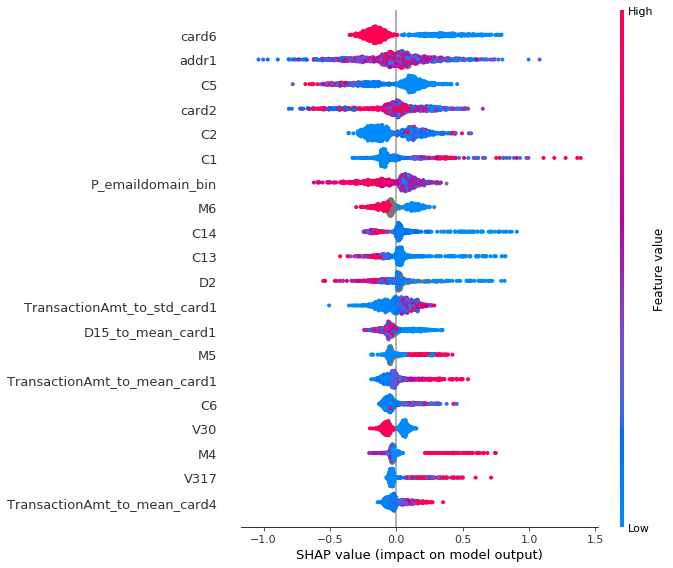

In [27]:
tv.summary_plot()

In [16]:
train_lgb_folds(ds)

Fold 1 started at Sun Aug 11 09:23:46 2019
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.999045	training's auc: 0.999045	valid_1's auc: 0.897155	valid_1's auc: 0.897155
[200]	training's auc: 0.999996	training's auc: 0.999996	valid_1's auc: 0.905106	valid_1's auc: 0.905106
[300]	training's auc: 1	training's auc: 1	valid_1's auc: 0.908466	valid_1's auc: 0.908466
[400]	training's auc: 1	training's auc: 1	valid_1's auc: 0.907834	valid_1's auc: 0.907834
Early stopping, best iteration is:
[253]	training's auc: 1	training's auc: 1	valid_1's auc: 0.908483	valid_1's auc: 0.908483
Fold 2 started at Sun Aug 11 09:24:24 2019
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.999348	training's auc: 0.999348	valid_1's auc: 0.89838	valid_1's auc: 0.89838
[200]	training's auc: 0.999998	training's auc: 0.999998	valid_1's auc: 0.893046	valid_1's auc: 0.893046
[300]	training's auc: 1	training's auc: 1	valid_1's auc: 0.890359	val

{'oof': array([[0.00251195],
        [0.00379201],
        [0.00139336],
        ...,
        [0.00082815],
        [0.00355993],
        [0.00046995]]), 'prediction': array([[0.00525096],
        [0.01072443],
        [0.00871113],
        ...,
        [0.00714342],
        [0.01669791],
        [0.0126176 ]]), 'scores': [0.9087311801788731,
  0.8985928170149414,
  0.8826558645581782,
  0.8620320037473699,
  0.9268108865881761]}

In [28]:
params = {
        "eta": 0.05,
        "max_depth": 9,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "gamma": 0.1,
        "subsample": 0.9,
        "colsample_bytree": 0.9,
        "verbosity": 0,
        "random_state": 1337,
        "nthread": -1,
    }

In [36]:
clf = train_xgb(X_train, y_train, X_valid, y_valid, ds.X_train.columns, params)

[0]	train-auc:0.8124	valid_data-auc:0.771828
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 200 rounds.
[100]	train-auc:0.998058	valid_data-auc:0.918854
[200]	train-auc:0.99999	valid_data-auc:0.927262
[300]	train-auc:1	valid_data-auc:0.924512
Stopping. Best iteration:
[170]	train-auc:0.999951	valid_data-auc:0.927509



In [37]:
sample = ds.X_train.sample(1000, random_state=314)
tv = TreeVisualizer(clf, sample)

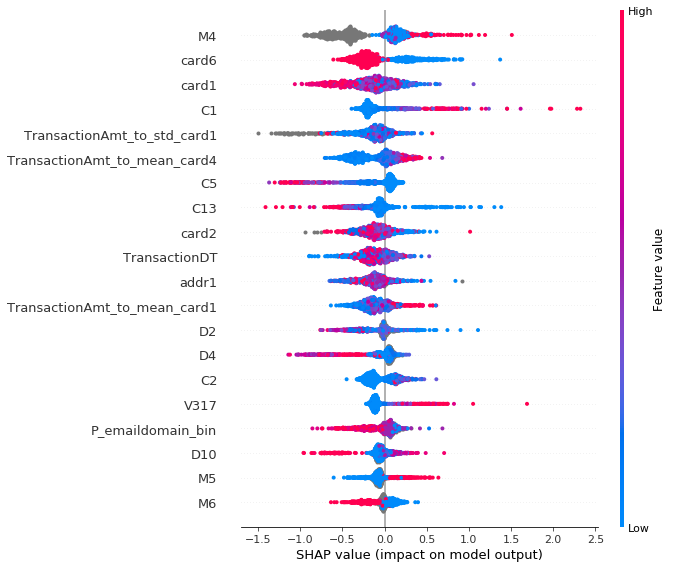

In [38]:
tv.summary_plot()

In [39]:
train_xgb_folds(ds)

Fold 1 started at Sun Aug 11 10:17:28 2019
[0]	train-auc:0.779349	valid_data-auc:0.722901
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 200 rounds.
[100]	train-auc:0.997495	valid_data-auc:0.770575
[200]	train-auc:0.999969	valid_data-auc:0.824356
Stopping. Best iteration:
[6]	train-auc:0.877263	valid_data-auc:0.84252

Fold 2 started at Sun Aug 11 10:19:00 2019


c:\utilisateurs\a557847\appdata\local\continuum\anaconda3\envs\ieee-fraud-detection\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.825873	valid_data-auc:0.710021
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 200 rounds.
[100]	train-auc:0.998177	valid_data-auc:0.885265
[200]	train-auc:0.999974	valid_data-auc:0.889265
[300]	train-auc:1	valid_data-auc:0.889404
Stopping. Best iteration:
[152]	train-auc:0.999835	valid_data-auc:0.890955

Fold 3 started at Sun Aug 11 10:20:33 2019


c:\utilisateurs\a557847\appdata\local\continuum\anaconda3\envs\ieee-fraud-detection\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.777552	valid_data-auc:0.774999
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 200 rounds.
[100]	train-auc:0.998691	valid_data-auc:0.863925
[200]	train-auc:0.999993	valid_data-auc:0.875206
Stopping. Best iteration:
[32]	train-auc:0.917654	valid_data-auc:0.882169

Fold 4 started at Sun Aug 11 10:21:35 2019


c:\utilisateurs\a557847\appdata\local\continuum\anaconda3\envs\ieee-fraud-detection\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.811067	valid_data-auc:0.790956
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 200 rounds.
[100]	train-auc:0.99759	valid_data-auc:0.880527
[200]	train-auc:0.999994	valid_data-auc:0.883874
[300]	train-auc:1	valid_data-auc:0.881071
Stopping. Best iteration:
[131]	train-auc:0.999636	valid_data-auc:0.884508

Fold 5 started at Sun Aug 11 10:23:17 2019


c:\utilisateurs\a557847\appdata\local\continuum\anaconda3\envs\ieee-fraud-detection\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.796882	valid_data-auc:0.792924
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 200 rounds.
[100]	train-auc:0.997955	valid_data-auc:0.922416
[200]	train-auc:0.999959	valid_data-auc:0.928837
[300]	train-auc:1	valid_data-auc:0.93005
[400]	train-auc:1	valid_data-auc:0.932842
[500]	train-auc:1	valid_data-auc:0.933598
[600]	train-auc:1	valid_data-auc:0.933069
[700]	train-auc:1	valid_data-auc:0.932379
Stopping. Best iteration:
[500]	train-auc:1	valid_data-auc:0.933598

CV mean score: 0.8868, std: 0.0290.


{'oof': array([[0.35670146],
        [0.35387427],
        [0.35387427],
        ...,
        [0.00039901],
        [0.00209919],
        [0.0034875 ]]), 'prediction': array([[0.0932605 ],
        [0.09513482],
        [0.09742661],
        ...,
        [0.09275866],
        [0.09552684],
        [0.11746964]]), 'scores': [0.8425201594975452,
  0.8909554241724812,
  0.8821687310119187,
  0.884507723283935,
  0.9335983591701158]}